In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn.naive_bayes import GaussianNB

In [2]:
df = pd.read_csv('../data/mushrooms.csv')

In [3]:
df.head()

class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1                      w                      w         p          w   
2                      w                      w         p          w   
3                      w                      w         p          w   
4                      w                      w         p          w   

  ring-number ring-type spore-print-color population habitat  
0           o         p                 k          s       u  
1           o         p                 n          n       g  
2           o         p                 n          n       m  
3           o         p                 k          s       u  
4           o         e                 n          a       g  

[5 rows x 23 columns]

In [4]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [6]:
X = df.drop('class', axis=1)
y = df['class']

In [7]:
X = pd.get_dummies(X)

In [8]:
X_train, X_test,y_train,  y_test = train_test_split(X,y, test_size=0.3, random_state = 42)

In [9]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [10]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [11]:
tree_pred = clf.predict(X_test)

In [12]:
tree_score = metrics.accuracy_score(tree_pred, y_test)

In [13]:
print('Accuracy: ', tree_score)
print('Report: ', metrics.classification_report(tree_pred, y_test))

Accuracy:  1.0
Report:                precision    recall  f1-score   support

           e       1.00      1.00      1.00      1257
           p       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [14]:
tree_cm = metrics.confusion_matrix(tree_pred, y_test)

Text(0.5, 1, 'Decision Tree Accuracy Score: 1.0')

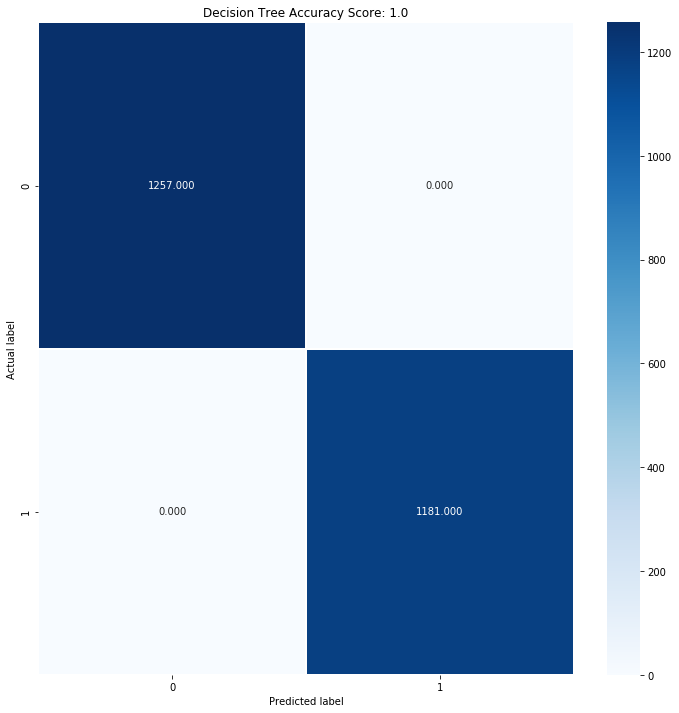

In [16]:
plt.figure(figsize=(12,12))
sns.heatmap(tree_cm, linewidths=1, fmt='.3f', cmap='Blues', annot=True)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
title = 'Decision Tree Accuracy Score: {0}'.format(tree_score)
plt.title(title)

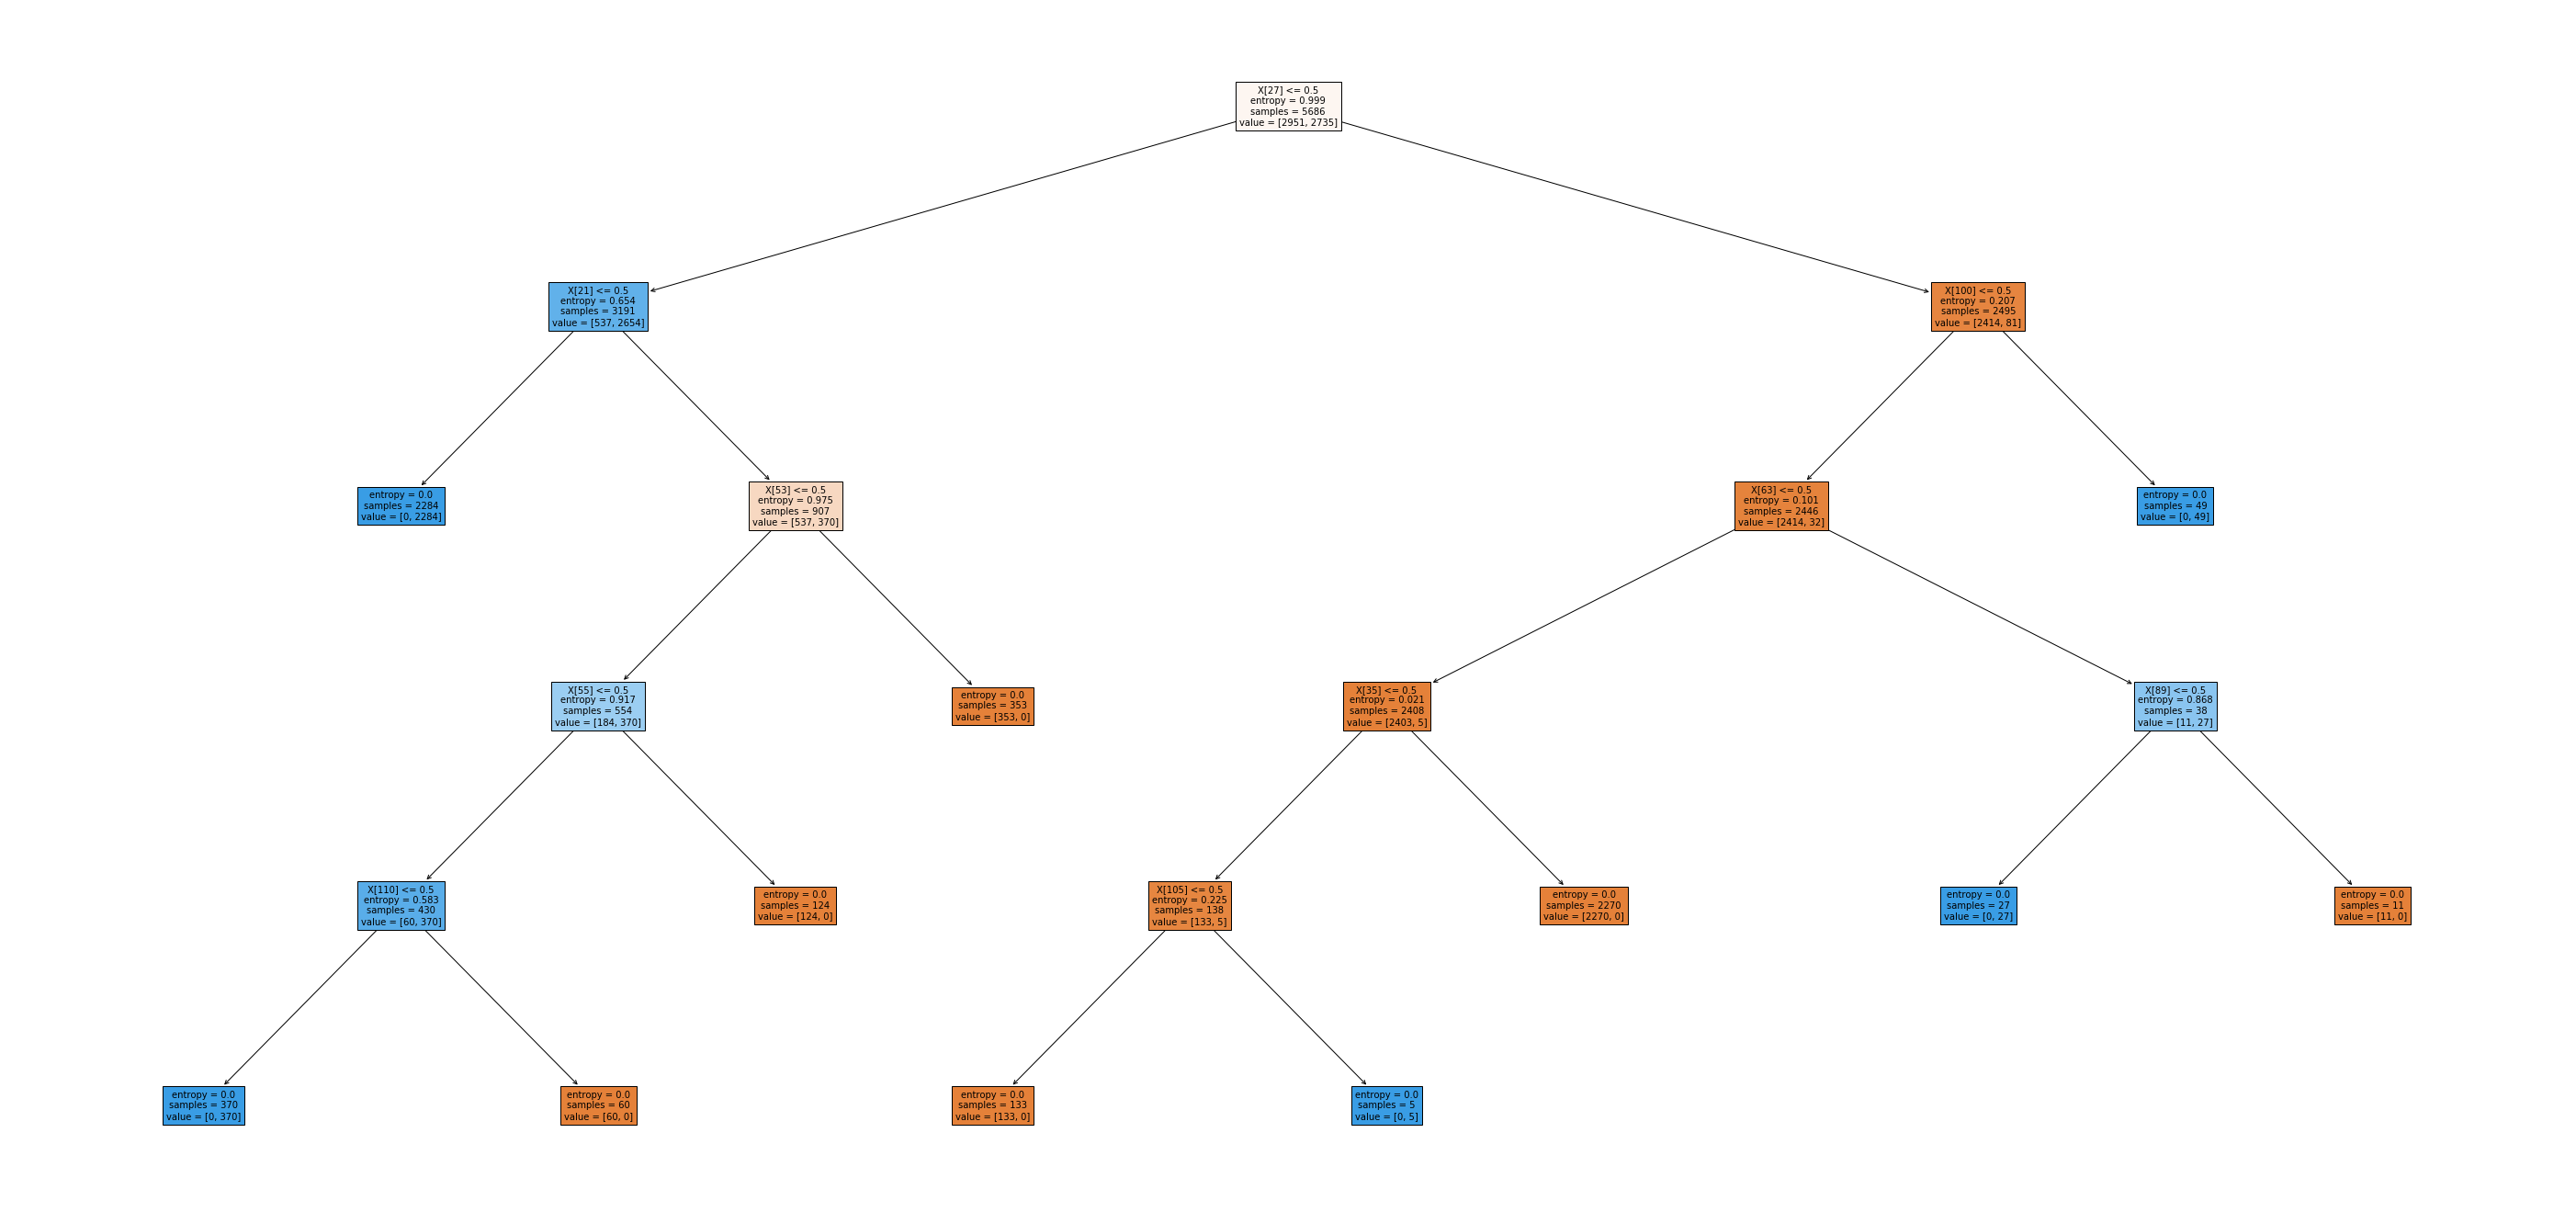

In [17]:
plt.subplots(figsize=(50,24))
tree.plot_tree(clf, filled=True, fontsize=10)
plt.show()

In [18]:
clf = tree.DecisionTreeClassifier(criterion='gini')

In [19]:
tree_pred = clf.fit(X_train, y_train).predict(X_test)

In [20]:
tree_score = metrics.accuracy_score(tree_pred, y_test)

In [21]:
print('Accuracy: ', tree_score)
print('Report: ', metrics.classification_report(tree_pred, y_test))

Accuracy:  1.0
Report:                precision    recall  f1-score   support

           e       1.00      1.00      1.00      1257
           p       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [22]:
tree_cm = metrics.confusion_matrix(tree_pred, y_test)

Text(0.5, 1, 'Decision Tree Accuracy Score: 1.0')

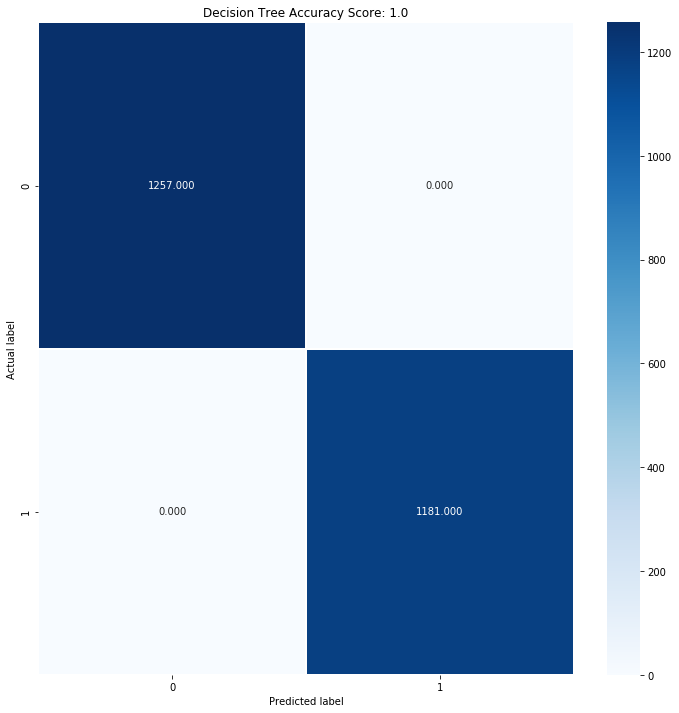

In [23]:
plt.figure(figsize=(12,12))
sns.heatmap(tree_cm, linewidths=1, fmt='.3f', cmap='Blues', annot=True)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
title = 'Decision Tree Accuracy Score: {0}'.format(tree_score)
plt.title(title)

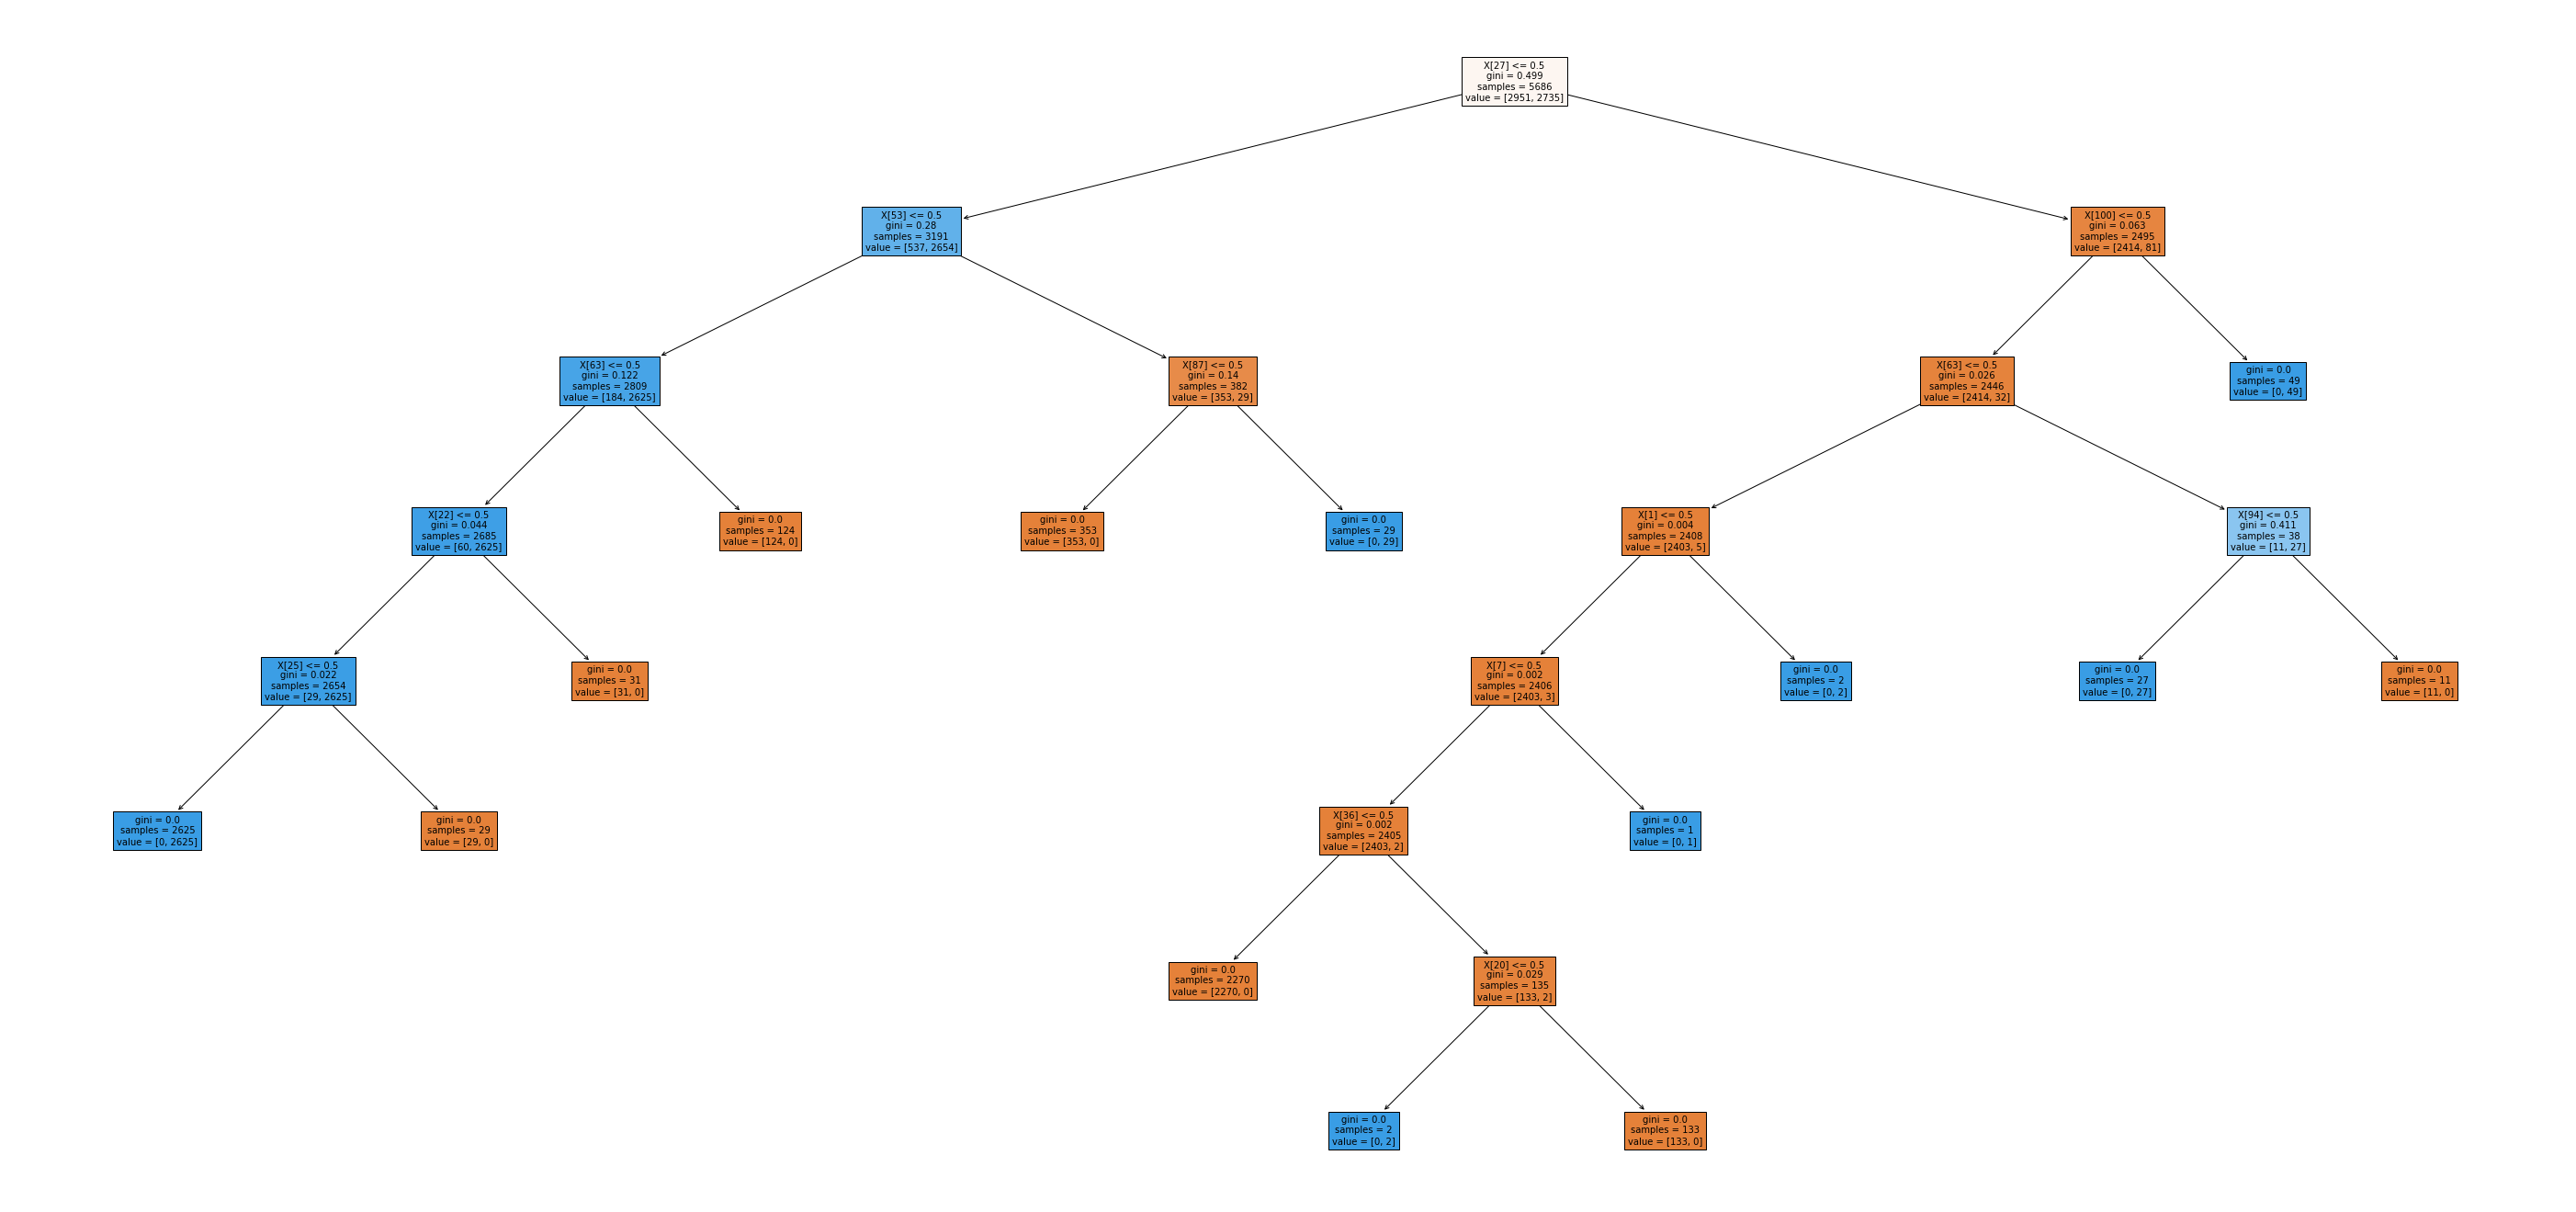

In [24]:
plt.subplots(figsize=(50,24))
tree.plot_tree(clf, filled=True, fontsize=10)
plt.show()

In [25]:
gnb = GaussianNB()

In [26]:
bayes_pred = gnb.fit(X_train, y_train).predict(X_test)

In [27]:
bayes_score = metrics.accuracy_score(bayes_pred, y_test)

In [28]:
print('Accuracy: ', bayes_score)
print('Report: ', metrics.classification_report(bayes_pred, y_test))

Accuracy:  0.9643150123051681
Report:                precision    recall  f1-score   support

           e       0.93      1.00      0.96      1172
           p       1.00      0.93      0.96      1266

    accuracy                           0.96      2438
   macro avg       0.97      0.97      0.96      2438
weighted avg       0.97      0.96      0.96      2438



In [29]:
bayes_cm = metrics.confusion_matrix(bayes_pred, y_test)

Text(0.5, 1, 'Naive Bayes Accuracy Score: 0.9643150123051681')

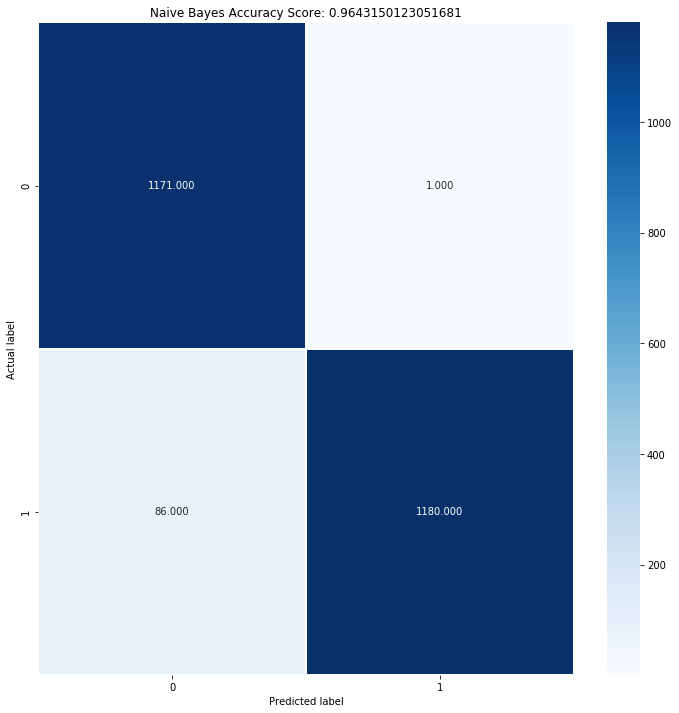

In [30]:
plt.figure(figsize=(12,12))
sns.heatmap(bayes_cm, annot=True, linewidths=1, fmt='.3f', cmap='Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
title = 'Naive Bayes Accuracy Score: {0}'.format(bayes_score)
plt.title(title)

## Nhận xét:
- Ta nhận thấy, mô hình cây quyết định cho dự đoán đúng chính xác 100% so với Naive Bayes

In [63]:
test = df.drop('class', axis=1)

In [64]:
from sklearn.preprocessing import LabelEncoder

In [65]:
label = LabelEncoder()

In [67]:
for col in test.columns:
    test[col] = label.fit_transform(test[col])

In [68]:
test

cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
0             5            2          4        1     6                1   
1             5            2          9        1     0                1   
2             0            2          8        1     3                1   
3             5            3          8        1     6                1   
4             5            2          3        0     5                1   
...         ...          ...        ...      ...   ...              ...   
8119          3            2          4        0     5                0   
8120          5            2          4        0     5                0   
8121          2            2          4        0     5                0   
8122          3            3          4        0     8                1   
8123          5            2          4        0     5                0   

      gill-spacing  gill-size  gill-color  stalk-shape  ...  \
0                0          1           4            0  ...   
1                0          0           4            0  ...   
2                0          0           5            0  ...   
3                0          1           5            0  ...   
4                1          0           4            1  ...   
...            ...        ...         ...          ...  ...   
8119             0          0          11            0  ...   
8120             0          0          11            0  ...   
8121             0          0           5            0  ...   
8122             0          1           0            1  ...   
8123             0          0          11            0  ...   

      stalk-surface-below-ring  stalk-color-above-ring  \
0                            2                       7   
1                            2                       7   
2                            2                       7   
3                            2                       7   
4                            2                       7   
...                        ...                     ...   
8119                         2                       5   
8120                         2                       5   
8121                         2                       5   
8122                         1                       7   
8123                         2                       5   

      stalk-color-below-ring  veil-type  veil-color  ring-number  ring-type  \
0                          7          0           2            1          4   
1                          7          0           2            1          4   
2                          7          0           2            1          4   
3                          7          0           2            1          4   
4                          7          0           2            1          0   
...                      ...        ...         ...          ...        ...   
8119                       5          0           1            1          4   
8120                       5          0           0            1          4   
8121                       5          0           1            1          4   
8122                       7          0           2            1          0   
8123                       5          0           1            1          4   

      spore-print-color  population  habitat  
0                     2           3        5  
1                     3           2        1  
2                     3           2        3  
3                     2           3        5  
4                     3           0        1  
...                 ...         ...      ...  
8119                  0           1        2  
8120                  0           4        2  
8121                  0           1        2  
8122                  7           4        2  
8123                  4           1        2  

[8124 rows x 22 columns]

In [75]:
y

0       p
1       e
2       e
3       p
4       e
       ..
8119    e
8120    e
8121    e
8122    p
8123    e
Name: class, Length: 8124, dtype: object

In [81]:
X_train, X_test,y_train, y_test = train_test_split(test, y, test_size=0.3, random_state=42)

In [82]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [83]:
tree_pred = clf.fit(X_train, y_train).predict(X_test)

In [84]:
tree_score = metrics.accuracy_score(y_test, tree_pred)

In [85]:
print('Accuracy: ', tree_score)
print('Report: ', metrics.classification_report(tree_pred, y_test))

Accuracy:  1.0
Report:                precision    recall  f1-score   support

           e       1.00      1.00      1.00      1257
           p       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438

